## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [3]:
plt.style.use(['ggplot'])

# 12. Machine learning techniques

In [4]:
import random as rd
rd.seed(0)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [6]:
# use pabdas to read './titanic.csv'
# raw_data = pd.read_csv('AFLW2000_CSV_Original.csv', sep = ',')
raw_data = pd.read_csv('AFLW2000_CSV_nose_CG_MAS.csv', sep = ',')
raw_data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,-0.309497,-0.285975,-0.246810,-0.216210,-0.194636,-0.195264,-0.226584,-0.221462,-0.056244,0.096381,...,0.139411,0.153945,0.159148,0.196136,0.280991,0.272756,0.254549,-0.399231,0.018227,0.085676
1,0.205442,0.210956,0.228387,0.233707,0.224956,0.206484,0.168428,0.116793,0.111631,0.191663,...,0.286260,0.275302,0.263634,0.247013,0.206502,0.200419,0.233591,0.470065,1.189533,0.300959
2,0.054645,0.054116,0.063376,0.076086,0.097308,0.125804,0.158100,0.208360,0.263332,0.371592,...,0.186263,0.210128,0.215700,0.197136,0.194725,0.176567,0.178897,-0.184650,0.881137,-0.236852
3,-0.062869,-0.038822,-0.020208,-0.013971,-0.007007,0.013662,0.053328,0.160931,0.310718,0.414956,...,0.190158,0.191204,0.181624,0.099781,0.203089,0.209832,0.223969,-0.175379,0.299208,-0.373374
4,0.259717,0.296746,0.344750,0.384270,0.421190,0.476713,0.520300,0.546417,0.467165,0.490719,...,0.155909,0.165737,0.156756,0.165952,0.173303,0.168895,0.180134,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.346658,-0.328150,-0.294228,-0.267771,-0.257138,-0.269200,-0.290232,-0.270644,-0.089482,0.054885,...,0.231111,0.235195,0.232475,0.176201,0.244635,0.240195,0.252900,-0.197102,-0.070430,0.105118
1996,-0.498375,-0.510201,-0.530007,-0.528051,-0.508303,-0.471376,-0.418450,-0.374258,-0.269266,-0.254004,...,0.277519,0.276557,0.257306,0.200779,0.224467,0.222407,0.247668,-0.232617,-1.418751,0.175960
1997,0.352632,0.375437,0.405259,0.426013,0.444391,0.466394,0.490682,0.504848,0.402812,0.402429,...,0.252454,0.268220,0.264325,0.234313,0.244397,0.234058,0.245337,-1.447955,1.431267,-1.509418
1998,-0.563043,-0.588248,-0.606106,-0.624682,-0.651062,-0.661465,-0.672839,-0.654102,-0.460020,-0.385161,...,0.332041,0.340356,0.318535,0.256463,0.304891,0.298597,0.330364,-0.420465,-1.191176,0.451515


## All Features

In [8]:
X = raw_data.iloc[:,0:136].to_numpy()

## 6 * 2 (12) Selected Features

In [9]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [10]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,-0.056244,0.0,-0.470227,0.569105,-0.220330,0.233254,0.223880,0.0,-0.711572,-0.585330,0.103511,0.193958
1,0.111631,0.0,0.115568,0.466820,0.126185,0.317864,0.209007,0.0,-0.091381,-0.288898,0.272404,0.240820
2,0.263332,0.0,0.008652,0.403707,0.075272,0.544189,0.229898,0.0,-0.132195,-0.332411,0.127276,0.195265
3,0.310718,0.0,-0.280594,0.403747,-0.014334,0.409155,0.225391,0.0,-0.248954,-0.663460,0.116440,0.094119
4,0.467165,0.0,0.099086,0.232030,0.306884,0.438872,0.214324,0.0,-0.165268,-0.338983,0.163763,0.165160
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.089482,0.0,-0.508142,0.447542,-0.263145,0.112873,0.229796,0.0,-0.626289,-0.464578,0.186107,0.174882
1996,-0.269266,0.0,-0.352252,-0.225729,-0.281376,-0.256681,0.262572,0.0,-0.279047,-0.273756,0.251401,0.193275
1997,0.402812,0.0,0.163700,0.182310,0.315156,0.305757,0.321737,0.0,-0.217058,-0.252905,0.215277,0.233589
1998,-0.460020,0.0,-0.437227,-0.133101,-0.580844,-0.337135,0.319849,0.0,-0.386636,-0.220165,0.304726,0.250972


In [11]:
#pitch, yaw, roll
p = raw_data[["136"]].to_numpy()
y = raw_data[["137"]].to_numpy()
r = raw_data[["138"]].to_numpy()

Next, we can explore the dataset.

In [12]:
X.shape

(2000, 12)

In [13]:
X.shape[0]

2000

In [14]:
X.shape[1]

12

In [15]:
# Use pandas to examine some info of the dataset
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 139 entries, 0 to 138
dtypes: float64(139)
memory usage: 2.1 MB


In [16]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.233877,-0.228203,-0.216267,-0.206013,-0.199688,-0.192968,-0.183349,-0.137267,0.018053,0.143081,...,0.236241,0.241335,0.238826,0.216203,0.282148,0.273550,0.290346,-0.107145,0.014077,-0.034479
std,0.250319,0.252915,0.256578,0.256088,0.255118,0.255120,0.256999,0.267530,0.223544,0.220234,...,0.082955,0.081515,0.084958,0.105512,0.108675,0.104323,0.111274,0.628119,0.654185,0.716014
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.992964,-0.775731,-0.605776,...,-0.205668,-0.106515,-0.146121,-0.296817,-0.115446,-0.098725,-0.205456,-12.457202,-6.130066,-16.969362
25%,-0.437347,-0.436675,-0.422648,-0.413327,-0.406076,-0.397937,-0.377848,-0.322875,-0.131178,0.001962,...,0.181413,0.186420,0.182705,0.145096,0.213263,0.206363,0.215877,-0.258503,-0.294246,-0.174806
50%,-0.250360,-0.235904,-0.212300,-0.198632,-0.196913,-0.204710,-0.208938,-0.165982,0.016790,0.168075,...,0.230714,0.236157,0.233780,0.208393,0.266190,0.260959,0.279475,-0.122268,0.019702,-0.018098
75%,-0.052337,-0.042175,-0.031732,-0.026892,-0.027065,-0.026183,-0.017095,0.033176,0.164766,0.290703,...,0.286264,0.288361,0.289307,0.277267,0.338031,0.326507,0.346267,0.040192,0.334715,0.134378
max,0.654113,0.694551,0.744361,0.788998,0.830620,0.890112,0.971928,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.598820,3.277500,5.829394


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

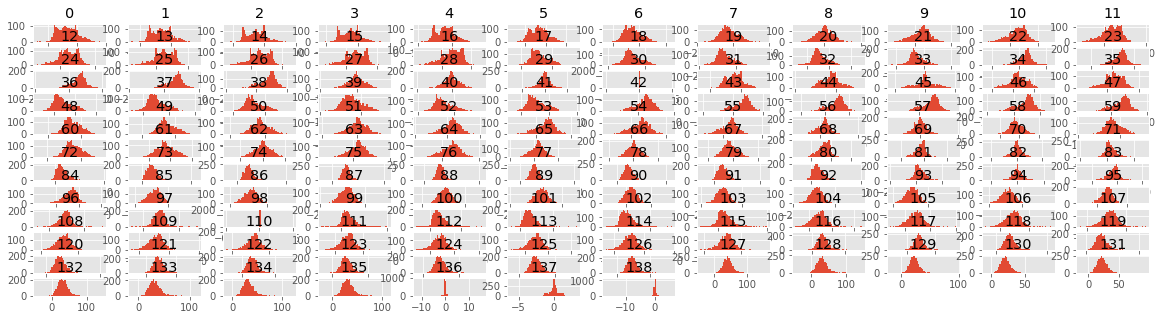

In [15]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist(bins = 50, figsize = (20, 5))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplo

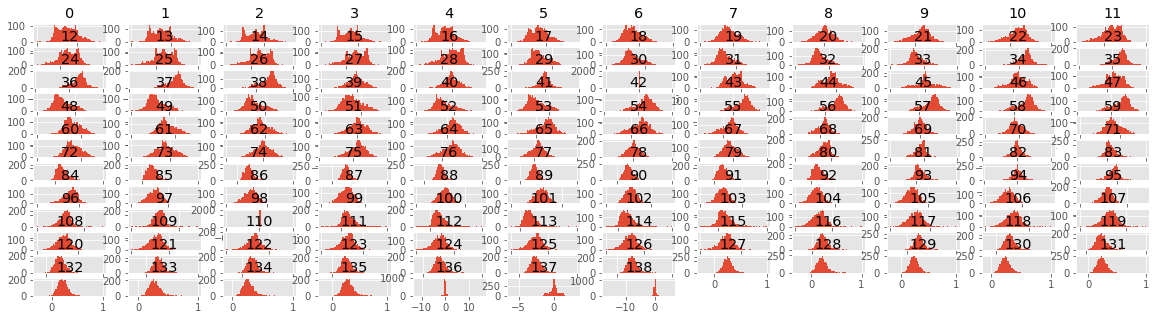

In [17]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist(bins = 50, figsize = (20, 5))

### 12.3.4 Feature selection

#### 6 * 2 (12) Selected Features

In [16]:
# preprocessed_data.head()

In [18]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [19]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,-0.056244,0.0,-0.470227,0.569105,-0.220330,0.233254,0.223880,0.0,-0.711572,-0.585330,0.103511,0.193958
1,0.111631,0.0,0.115568,0.466820,0.126185,0.317864,0.209007,0.0,-0.091381,-0.288898,0.272404,0.240820
2,0.263332,0.0,0.008652,0.403707,0.075272,0.544189,0.229898,0.0,-0.132195,-0.332411,0.127276,0.195265
3,0.310718,0.0,-0.280594,0.403747,-0.014334,0.409155,0.225391,0.0,-0.248954,-0.663460,0.116440,0.094119
4,0.467165,0.0,0.099086,0.232030,0.306884,0.438872,0.214324,0.0,-0.165268,-0.338983,0.163763,0.165160
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.089482,0.0,-0.508142,0.447542,-0.263145,0.112873,0.229796,0.0,-0.626289,-0.464578,0.186107,0.174882
1996,-0.269266,0.0,-0.352252,-0.225729,-0.281376,-0.256681,0.262572,0.0,-0.279047,-0.273756,0.251401,0.193275
1997,0.402812,0.0,0.163700,0.182310,0.315156,0.305757,0.321737,0.0,-0.217058,-0.252905,0.215277,0.233589
1998,-0.460020,0.0,-0.437227,-0.133101,-0.580844,-0.337135,0.319849,0.0,-0.386636,-0.220165,0.304726,0.250972


Next, we can explore the dataset.

In [20]:
X.shape

(2000, 12)

In [21]:
X.shape[0]

2000

In [22]:
X.shape[1]

12

### 12.3.5 Saving for future use

In [23]:
#preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

### 12.4.1 Features-labels split and train-validation split

In [24]:
# features = raw_data[xy_list]
features = raw_data.iloc[:,0:136].to_numpy()

In [57]:
#pitch, yaw, roll
# p = data[["136"]].to_numpy()
labels = raw_data[["138"]].to_numpy()
# y = raw_data[["137"]].to_numpy()
# r = raw_data[["138"]].to_numpy()

In [58]:
from sklearn.model_selection import train_test_split

In [121]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size = 0.2, random_state=13)

In [122]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size = 0.5, random_state=100)

In [123]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

1600
200
200
1600
200
200


### 12.4.2 Training different models on our dataset

We'll train six models:
- Linear Regression
- Decision tree Regressor
- Support vector Regression (SVR)
- RandomForestRegressor
- GradientBoostingRegressor
- AdaBoostRegressor

In [108]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(features_train, labels_train)

In [109]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(features_train, labels_train)

In [110]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVR

svm_model = SVR().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [111]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVR

svr_model_linear = SVR(kernel='linear').fit(features_train, labels_train)
svr_model_poly = SVR(kernel='poly').fit(features_train, labels_train)           # default = 3
svr_model_poly4 = SVR(kernel='poly', degree=4).fit(features_train, labels_train)
svr_model_poly5 = SVR(kernel='poly', degree=5).fit(features_train, labels_train)
svr_model_rbf = SVR(kernel='rbf').fit(features_train, labels_train)
svr_model_sigmoid = SVR(kernel='sigmoid').fit(features_train, labels_train)
#svr_model_precomputed = SVR(kernel='precomputed').fit(features_train, labels_train)


D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [112]:
print("SVR_L:", svr_model_linear.score(features_validation,labels_validation))
print("SVR_P:", svr_model_poly.score(features_validation,labels_validation))
print("SVR_P4:", svr_model_poly4.score(features_validation,labels_validation))
print("SVR_P5:", svr_model_poly5.score(features_validation,labels_validation))
print("SVR_rbf:", svr_model_rbf.score(features_validation,labels_validation))
print("SVR_sigmoid:", svr_model_sigmoid.score(features_validation,labels_validation))
#print("SVR_pre:", svr_model_precomputed.score(features_validation,labels_validation))

SVR_L: 0.6960599232839548
SVR_P: 0.7603797147013551
SVR_P4: 0.6358401769908999
SVR_P5: 0.46188110307994523
SVR_rbf: 0.834265520571432
SVR_sigmoid: -289.4727990846009


In [113]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor().fit(features_train, labels_train)

C:\Users\ABDELR~1\AppData\Local\Temp/ipykernel_26284/198170182.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestRegressor().fit(features_train, labels_train)


In [114]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [115]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor().fit(features_train, labels_train)

D:\Applications\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [116]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.multioutput import MultiOutputRegressor
labels_train = raw_data.iloc[0:1200,136:140].to_numpy()
# ab_model = AdaBoostRegressor().fit(features_train, labels_train)
mor_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(features_train, labels_train)
    # .predict(features_validation)

ValueError: Found input variables with inconsistent numbers of samples: [1400, 1200]

### 12.4.3 Evaluating the models

#### Accuracy

In [ ]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_validation,labels_validation))
print("Decision tree:", dt_model.score(features_validation,labels_validation))
print("SVR:", svm_model.score(features_validation,labels_validation))
print("Random forest:", rf_model.score(features_validation,labels_validation))
print("Gradient boosting:", gb_model.score(features_validation,labels_validation))
print("AdaBoost:", ab_model.score(features_validation,labels_validation))

In [ ]:
print("MultiOutputRegressor:", mor_model.score(features_validation,labels_validation))

#### R2-score

In [117]:
# print F1-score of each model on validation data
from sklearn.metrics import r2_score

print("R2-scores of the models:")
labels_predict = lr_model.predict(features_validation)
print("Linear regression:", r2_score(labels_validation, labels_predict))
labels_predict = dt_model.predict(features_validation)
print("Decision tree:", r2_score(labels_validation, labels_predict))
labels_predict = svm_model.predict(features_validation)
print("SVR:", r2_score(labels_validation, labels_predict))
labels_predict = rf_model.predict(features_validation)
print("Random forest:", r2_score(labels_validation, labels_predict))
labels_predict = gb_model.predict(features_validation)
print("Gradient boosting:", r2_score(labels_validation, labels_predict))
labels_predict = ab_model.predict(features_validation)
print("AdaBoost:", r2_score(labels_validation, labels_predict))

R2-scores of the models:
Linear regression: -0.021632161405914285
Decision tree: 0.38293489391749835
SVR: 0.834265520571432
Random forest: 0.7547211961816602
Gradient boosting: 0.7528271197636472
AdaBoost: 0.4552538059230088


### R2-score

In [399]:
# r2score = r2_score(labels_validation, labels_predict, sample_weight=None, multioutput='uniform_average')
# r2score

### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [118]:
# print accuracy of gradient boost model on testing data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_test,labels_test))
print("Decision tree:", dt_model.score(features_test,labels_test))
print("SVR:", svm_model.score(features_test,labels_test))
print("Random forest:", rf_model.score(features_test,labels_test))
print("Gradient boosting:", gb_model.score(features_test,labels_test))
print("AdaBoost:", ab_model.score(features_test,labels_test))


Scores of the models
Linear regression: 0.24096666524519827
Decision tree: 0.0029434630872228196
SVR: 0.11753167111612473
Random forest: 0.6379412058316143
Gradient boosting: 0.8600302182352002
AdaBoost: 0.8547481264003824


In [37]:
print("MultiOutputRegressor:", mor_model.score(features_test,labels_test))

ValueError: y_true and y_pred have different number of output (1!=3)

In [38]:
# print F1-score of gradient boost model on testing data
print("F1-scores of the models:")
labels_predict = lr_model.predict(features_test)
print("Linear regression:", f1_score(labels_test, labels_predict))
labels_predict = dt_model.predict(features_test)
print("Decision tree:", f1_score(labels_test, labels_predict))
labels_predict = svm_model.predict(features_test)
print("SVM:", f1_score(labels_test, labels_predict))
labels_predict = rf_model.predict(features_test)
print("Random forest:", f1_score(labels_test, labels_predict))
labels_predict = gb_model.predict(features_test)
print("Gradient boosting:", f1_score(labels_test, labels_predict))
labels_predict = ab_model.predict(features_test)
print("AdaBoost:", f1_score(labels_test, labels_predict))

F1-scores of the models:


NameError: name 'f1_score' is not defined

# 12.5 Grid search

In [124]:
from sklearn.model_selection import GridSearchCV
# CV -> Cross validation

In [125]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100],
                  'gamma': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100]
                }
# use gridsearch to find the best hyperparameters 
svm = SVR()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)

svm_gs.fit(features_train, np.ravel(labels_train))
# git the best model 
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.6979875412980723

In [126]:
svm_winner

SVR(C=10, gamma=0.1)

# 12.6 Cross validation

In [130]:
# print the k-fold cross validation output
svm_gs.cv_results_

{'mean_fit_time': array([0.10072088, 0.09500861, 0.09724603, 0.09981489, 0.09623604,
        0.0942616 , 0.09264588, 0.09641542, 0.08277359, 0.0894721 ,
        0.10405183, 0.07162514, 0.0719481 , 0.07056375, 0.06935363,
        0.07058568, 0.06825309, 0.06538415, 0.06951003, 0.0725462 ,
        0.08814545, 0.10289383, 0.07019873, 0.07035313, 0.07003007,
        0.06930161, 0.07006574, 0.07182341, 0.07022729, 0.06817317,
        0.07232251, 0.08461981, 0.10196209, 0.07058206, 0.07039108,
        0.07023082, 0.06875591, 0.06902237, 0.060887  , 0.04012589,
        0.05540051, 0.07140417, 0.0861712 , 0.10278678, 0.07250376,
        0.07163081, 0.07162151, 0.07076964, 0.06949425, 0.06800408,
        0.06173272, 0.06585522, 0.07360082, 0.08956084, 0.10307674,
        0.0696291 , 0.06909113, 0.07111053, 0.06104555, 0.06893935,
        0.0526752 , 0.03012204, 0.04971662, 0.07300773, 0.08750434,
        0.10274982, 0.06950221, 0.0600975 , 0.06769543, 0.02861729,
        0.05119395, 0.02419996,

# 12.7 Save the model

In [134]:
# use joblib to save the model
import joblib

joblib.dump(svm_winner, "svm_model_CG_y.pkl")

# Later 
# my_model_loaded = joblib.load("svm_model.pkl")

['svm_model_CG_y.pkl']

In [402]:
# use joblib to save the model
import joblib

# joblib.dump(gb_model, "gb_model.pkl")

# joblib.dump(svm_model, "svm_model_p.pkl")
joblib.dump(dt_model, "dt_model_p.pkl")


# Later
# my_model_loaded = joblib.load("svm_model.pkl")

['dt_model_p.pkl']